<a href="https://colab.research.google.com/github/Schwarzam/NN-SPLUS/blob/master/Classification_4types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import shutil
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir
from os.path import isfile, join

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/trainsets/ClassGalaxies.zip \
    -O /tmp/cats_and_dogs_filtered.zip

In [ ]:
local_zip = '/tmp/ClassGalaxies.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
base_dir = '/tmp/Galaxies/'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training merger pictures
train_merger_dir = os.path.join(train_dir, 'Merger')
# Directory with our training spiral pictures
train_spiral_dir = os.path.join(train_dir, 'Spiral')
# Directory with our training elliptical pictures
train_elliptical_dir = os.path.join(train_dir, 'Elliptical')
# Directory with our training lenticular pictures
train_lenticular_dir = os.path.join(train_dir, 'Lenticular')

# Directory with our training merger pictures
test_merger_dir = os.path.join(test_dir, 'Merger')
# Directory with our training spiral pictures
test_spiral_dir = os.path.join(test_dir, 'Spiral')
# Directory with our training elliptical pictures
test_elliptical_dir = os.path.join(test_dir, 'Elliptical')
# Directory with our training lenticular pictures
test_lenticular_dir = os.path.join(test_dir, 'Lenticular')

# Directory with our validation merger pictures
validation_merger_dir = os.path.join(validation_dir, 'Merger')
# Directory with our validation spiral pictures
validation_spiral_dir = os.path.join(validation_dir, 'Spiral')
# Directory with our validation elliptical pictures
validation_elliptical_dir = os.path.join(validation_dir, 'Elliptical')
# Directory with our validation lenticular pictures
validation_lenticular_dir = os.path.join(validation_dir, 'Lenticular')

try:
  os.mkdir(train_dir)
  os.mkdir(test_dir)
  os.mkdir(validation_dir)
except:
  pass

try:
  os.mkdir(train_merger_dir)
  os.mkdir(train_spiral_dir)
  os.mkdir(train_elliptical_dir)
  os.mkdir(train_lenticular_dir)

  os.mkdir(test_merger_dir)
  os.mkdir(test_spiral_dir)
  os.mkdir(test_elliptical_dir)
  os.mkdir(test_lenticular_dir)

  os.mkdir(validation_merger_dir)
  os.mkdir(validation_spiral_dir)
  os.mkdir(validation_elliptical_dir)
  os.mkdir(validation_lenticular_dir)
except:
  pass

In [ ]:
Merger_dir = os.path.join(base_dir, 'Merger')
Spiral_dir = os.path.join(base_dir, 'Spiral')
Elliptical_dir = os.path.join(base_dir, 'Elliptical')
Lenticular_dir = os.path.join(base_dir, 'Lenticular')

In [ ]:
train_set = 0.7
test_set = 0.2
val_set = 0.1

In [ ]:
source_dirs = [Merger_dir, Spiral_dir, Elliptical_dir, Lenticular_dir]

## create train dirs
for src in source_dirs:
  files = [f for f in listdir(src) if isfile(join(src, f))]

  if str(src).split('/')[3] == 'Merger':
    dest = train_merger_dir
  if str(src).split('/')[3] == 'Spiral':
    dest = train_spiral_dir
  if str(src).split('/')[3] == 'Elliptical':
    dest = train_elliptical_dir
  if str(src).split('/')[3] == 'Lenticular':
    dest = train_lenticular_dir

  files = files[0:int(train_set*len(files))]

  for filename in files:
    source = os.path.join(src, filename)
    dst = os.path.join(dest, filename)
    shutil.copyfile(source, dst)
    del source
    dst = dest

In [ ]:
## create test dirs
for src in source_dirs:
  files = [f for f in listdir(src) if isfile(join(src, f))]

  if str(src).split('/')[3] == 'Merger':
    dest = test_merger_dir
  if str(src).split('/')[3] == 'Spiral':
    dest = test_spiral_dir
  if str(src).split('/')[3] == 'Elliptical':
    dest = test_elliptical_dir
  if str(src).split('/')[3] == 'Lenticular':
    dest = test_lenticular_dir

  files = files[int(train_set*len(files)):int(train_set*len(files)) + int(test_set*len(files))]

  for filename in files:
    source = os.path.join(src, filename)
    dst = os.path.join(dest, filename)
    shutil.copyfile(source, dst)
    del source
    dst = dest

In [ ]:
## create validation dirs
for src in source_dirs:
  files = [f for f in listdir(src) if isfile(join(src, f))]

  if str(src).split('/')[3] == 'Merger':
    dest = validation_merger_dir
  if str(src).split('/')[3] == 'Spiral':
    dest = validation_spiral_dir
  if str(src).split('/')[3] == 'Elliptical':
    dest = validation_elliptical_dir
  if str(src).split('/')[3] == 'Lenticular':
    dest = validation_lenticular_dir

  files = files[int(train_set*len(files)) + int(test_set*len(files)):int(train_set*len(files)) + int(test_set*len(files)) + int(val_set*len(files))]

  for filename in files:
    source = os.path.join(src, filename)
    dst = os.path.join(dest, filename)
    shutil.copyfile(source, dst)
    del source
    dst = dest

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(217,217),
    batch_size=20,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(217,217),
    batch_size=20,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(217,217),
    batch_size=20,
    class_mode='categorical'
)

Found 1867 images belonging to 4 classes.
Found 532 images belonging to 4 classes.
Found 265 images belonging to 4 classes.


In [ ]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(217, 217, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
from keras import optimizers
model.compile(loss = 'categorical_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
      train_generator,
      epochs=60,
      validation_data=test_generator,
      verbose=2)

Epoch 1/60
94/94 - 16s - loss: 0.6270 - accuracy: 0.7520 - val_loss: 0.8065 - val_accuracy: 0.6447
Epoch 2/60
94/94 - 16s - loss: 0.6068 - accuracy: 0.7579 - val_loss: 1.0905 - val_accuracy: 0.5639
Epoch 3/60
94/94 - 16s - loss: 0.6190 - accuracy: 0.7563 - val_loss: 0.9706 - val_accuracy: 0.5808
Epoch 4/60
94/94 - 16s - loss: 0.6045 - accuracy: 0.7702 - val_loss: 1.0913 - val_accuracy: 0.5564
Epoch 5/60
94/94 - 16s - loss: 0.6054 - accuracy: 0.7697 - val_loss: 1.2154 - val_accuracy: 0.5695
Epoch 6/60
94/94 - 16s - loss: 0.6016 - accuracy: 0.7659 - val_loss: 0.8370 - val_accuracy: 0.6692
Epoch 7/60
94/94 - 16s - loss: 0.5641 - accuracy: 0.7868 - val_loss: 0.5795 - val_accuracy: 0.7838
Epoch 8/60
94/94 - 16s - loss: 0.5969 - accuracy: 0.7708 - val_loss: 1.5278 - val_accuracy: 0.4793
Epoch 9/60
94/94 - 16s - loss: 0.5573 - accuracy: 0.7836 - val_loss: 0.5877 - val_accuracy: 0.7914
Epoch 10/60
94/94 - 16s - loss: 0.5976 - accuracy: 0.7691 - val_loss: 1.1616 - val_accuracy: 0.5583
Epoch 11/

In [ ]:
resultado = model.evaluate(validation_generator)
resultado

14/14 [==============================] - 0s 26ms/step - loss: 0.4870 - accuracy: 0.8340


[0.4869776964187622, 0.8339622616767883]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

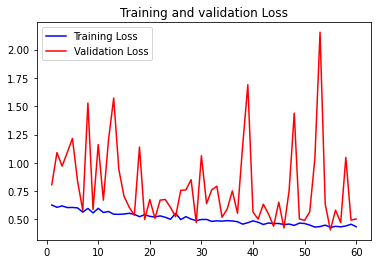

In [ ]:
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

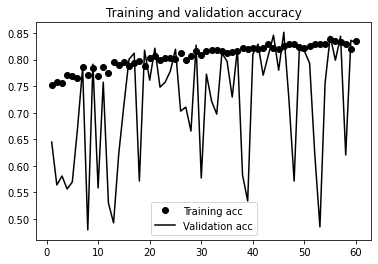

In [ ]:
plt.plot(epochs, acc, 'ko', label='Training acc')
plt.plot(epochs, val_acc, 'k', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [ ]:
img_path = os.path.join(Merger_dir, 'SPLUS.STRIPE82-0001.27137.griz.jpg')

from keras.preprocessing import image

img = image.load_img(img_path, target_size=(217,217))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

In [ ]:
layer_names = []
for layer in model.layers:
  layer_names.append(layer.name)

layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]

  size = layer_activation.shape[1]

  n_cols = n_features // images_per_row
  display_grid = np.zeros((size * n_cols, images_per_row * size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[0, :, :, col * images_per_row + row]

      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image *= 64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255). astype('uint8')
      display_grid[col * size : (col+1) * size,
                   row * size : (row + 1) * size] = channel_image

  scale = 1./ size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')